In [1]:
#matplotlib does have some support for both animation and interactivity. We call this the backend that renders the plot to the stream. Animation and interactivity heavily depend on support from this backend layer. And using a backend like the image png1 doesn't provide this. However, the NBN backend or the matplotlib notebook magic function does provide for some interactivity, so we can leverage that here.
#the matplotlib.animation module contains important helpers for building animation
#for our discussion, the important object here is to call Funcanimation. and it builds an animation by iteratively calling a function which you define.
#essentially, your function will either clear the axis and redraw the next frame which you want the users to se or will return a list of objects which need to be redrawn 

#first we have to define our backend
%matplotlib notebook

#second we import our modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
sns.set()

#lets draw an histogram from one sample thru to 100 samples

n = 1000 #we define our n as 100
x = np.random.randn(n)#we then pick 100 numbers at random from a standard normal distribution and put them into our variable


In [2]:
#next we have to actually create a function which will do the plotting,
#we will call the function update.

def update(curr):
    #the matplotlib FuncAnimation object is going to call this every few milliseconds and pas in the frame number we are on starting with the frame zero,
    #so we can use this as the index to our array values which we calles x
    #the very first thing that we need to do is to see if the current frame is at the end of our list.
    #if so we need to tell the animation to stop.
    #we do this by calling the stop object on the event source object attached to the FuncAnimation object
    if curr == n:
        a.event_source.stop()#we are going to call it animation a, thats why we use it here
    plt.cla()#we need to clear our current axis by calling the pl.cla() function.
    #the we need to create a histogram using a set of value in the x up to the current value. slicing is good for this
    bins = np.arange(-4, 4, 0.5)
    #we also need to consider the bins
    #previously we just passed in a single number for the bins eg 10 or 100.
    #but we can also pass in the spacing in between bins since we want all our bins set and evenly spaced, because we are
    #redrawing our animatiom every tick of the clock, we can use the numpy arange function.
    #this will ensure th bins dont change, we use the balance of -4 to +4, in each half-step increament
    
    #we also need to set the axis values since otherwise, the histogram will continually autoscale between frames which could be annoying.
    plt.hist(x[:curr], bins=bins, color = 'green', label='standard normal histogram')
    #so we will just hardcode some values here, often the bin sizes and use 30 as an x and 
    plt.axis([-4,4,0,270])#takes in four parameters, first, the xmin, second, the xmax, third, the ymin and lastly the ymax, should be passed as a list
    #a couple of labels and titles to make the chart look a little better.
    plt.gca().set_title('sampling the Normal Distribution')#we get the current axis and set the title of our histogram
    plt.gca().set_xlabel('value')#we get the current axis and label the x-axis
    plt.gca().set_ylabel('Frequency')#we get the current axis and label the y-axis
    plt.gca().legend(loc=2)
    plt.annotate(f'n = {curr}', [3,28])#plt.annote shows the number of times our function is updated and the econd parameter takes in the axis at which the annotation is placed

<IPython.core.display.Javascript object>


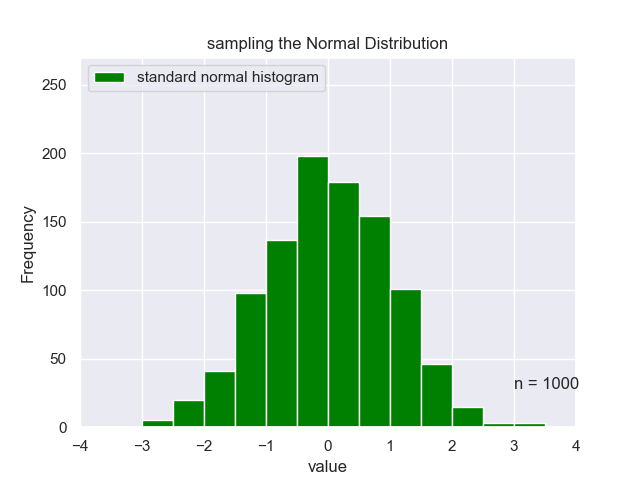

In [3]:
#lets just generate a new figure, then call the FuncAnimation constructor and we'll assig this to variable a
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=20)#we create our event a and assign it to a funcanimation which takes in three parameters
#the first parameter is the figure we just defined above,
#the second parameter is our function update we also defined in the cell above,
#and the last parameter interval is the interval in milliseconds that the function takes before it updates the event animation